In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
data = pd.read_csv(r"D:\copied\dwsktop\MACHINE LEARNING\heartdataset.csv")

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,53.275714,132.451429,183.681429,0.261429,132.607143,0.823143,0.578571
std,9.600592,18.635935,118.456079,0.439727,24.783150,1.015252,0.494141
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,107.500000,0.000000,116.000000,0.000000,0.000000
50%,54.000000,130.000000,215.000000,0.000000,130.000000,0.400000,1.000000
75%,60.000000,140.000000,261.000000,1.000000,150.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,190.000000,5.000000,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_4880\3868731434.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MaxHR'])


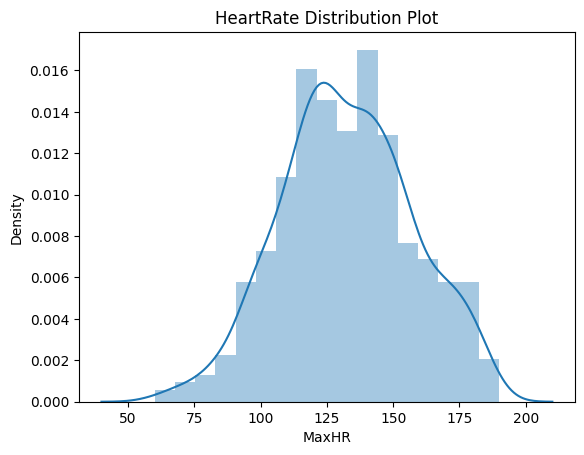

In [6]:
# Data distribution
plt.title('HeartRate Distribution Plot')
sns.distplot(data['MaxHR'])
plt.show()

In [7]:
# Visualizing the relationship between Age and MaxHR
plt.figure(figsize=(8,5))
sns.scatterplot(x=X['Age'], y=Y, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Scatter Plot of Age vs MaxHR')
plt.show()

NameError: name 'X' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Splitting variables
X = data.iloc[:, :1]  # independent
y = data.iloc[:, 1:]  # dependent

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Print the shape of train and test sets
print(f'Training set shape: {X_train.shape}, {Y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {Y_test.shape}')

Training set shape: (560, 1), (560,)
Testing set shape: (140, 1), (140,)


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Retrieve model parameters
intercept = model.intercept_
slope = model.coef_[0]
print(f'Intercept: {intercept}')
print(f'Slope: {slope}')

Intercept: 191.9444335649065
Slope: -1.1073999131276109


In [ ]:
# Predictions
Y_pred = model.predict(X_test)

In [ ]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': Y_test.values, 'Predicted': Y_pred})
print(comparison_df.head())

   Actual   Predicted
0     100  143.218837
1     140  119.963439
2     143  123.285639
3     150  129.930038
4     109  122.178239


In [ ]:
# Evaluate the model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Mean Absolute Error: 22.01699248809252
Mean Squared Error: 695.811844268199
Root Mean Squared Error: 26.378245663201316
R-squared Score: 0.13522990378424626


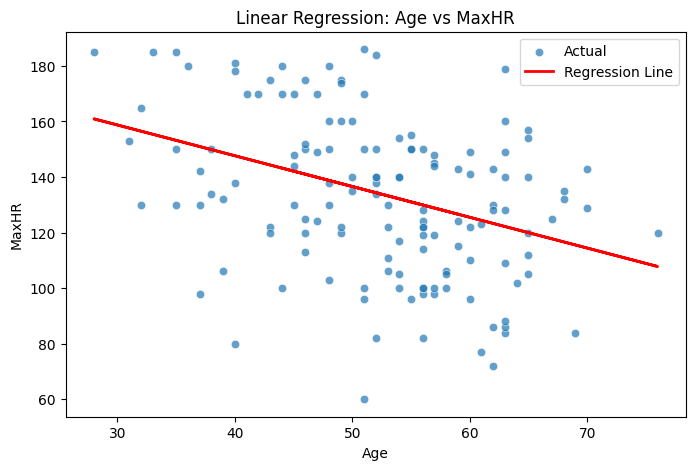

In [ ]:
# Plot regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Age'], y=Y_test, alpha=0.7, label='Actual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Linear Regression: Age vs MaxHR')
plt.legend()
plt.show()

Observations:
- The scatter plot shows a general trend where MaxHR decreases with Age.
- The regression model attempts to capture this trend with a straight-line fit.
- The model parameters (intercept and slope) describe this line.
- The evaluation metrics (MAE, MSE, RMSE, R-squared) indicate how well the model fits the data.
- A lower MAE and RMSE suggest better predictions.
- A higher R-squared value (closer to 1) indicates a better fit.